In [7]:
from bs4 import BeautifulSoup as BS
import requests
import json
import time
import datetime

import pandas as pd
import numpy as np
import datetime

from nltk.sentiment.vader import SentimentIntensityAnalyzer


import matplotlib.pyplot as plt
import seaborn           as sns
sns.set_style("darkgrid")
%matplotlib inline

In [8]:
# Extract sentiment analysis from pickle form
sentiment = pd.read_pickle("sentiment_pickle.pkl")
sentiment.head()

,abstract,web_url,snippet,pub_date,_id,article,VADER snippet neg,VADER snippet neu,VADER snippet pos,VADER snippet compound,date
0,"It was a year full of big environmental news, ...",https://green.blogs.nytimes.com/2010/12/31/201...,"It was a year full of big environmental news, ...",2010-12-31T23:00:27+0000,nyt://article/6932d941-5087-54fd-a1ac-9b625bd9...,,0.163,0.837,0.000,-0.5106,2010-12-31
1,The first federal regulations on climate-alter...,https://www.nytimes.com/2010/12/31/science/ear...,The first federal regulations on climate-alter...,2010-12-31T01:47:00+0000,nyt://article/3cc71f15-7131-58f9-b561-81115150...,,0.114,0.886,0.000,-0.4767,2010-12-31
2,About $11 billion in oil and natural gas trade...,https://www.nytimes.com/2010/12/31/business/gl...,About $11 billion in oil and natural gas trade...,2010-12-30T20:21:30+0000,nyt://article/d8808e92-9912-50bf-b1f4-efd46aef...,,0.072,0.847,0.081,0.0772,2010-12-30
3,"Recent years have been humbling for oil bulls,...",https://www.nytimes.com/2010/12/30/business/30...,"Recent years have been humbling for oil bulls,...",2010-12-30T02:34:46+0000,nyt://article/a3ab7378-223e-5c33-a8bd-48da47e0...,,0.000,0.868,0.132,0.5640,2010-12-30
4,Crude oil traded over $90 for a fifth consecut...,https://www.nytimes.com/2010/12/30/business/30...,Crude oil traded over $90 for a fifth consecut...,2010-12-29T14:06:12+0000,nyt://article/8cf8d370-fd0b-5889-a8af-3745ada9...,,0.215,0.785,0.000,-0.6369,2010-12-29


In [9]:
# clean dataframe to show only date and sentiment compound score
sentiment_compound = sentiment.drop(columns=['abstract', 'web_url', 'snippet', 'pub_date', '_id', 'article', 'VADER snippet neg', 'VADER snippet neu', 'VADER snippet pos'])
sentiment_compound

,VADER snippet compound,date
0,-0.5106,2010-12-31
1,-0.4767,2010-12-31
2,0.0772,2010-12-30
3,0.5640,2010-12-30
4,-0.6369,2010-12-29
...,...,...
1515,-0.6705,2019-02-04
1516,0.5994,2019-02-03
1517,0.1027,2019-01-27
1518,0.4215,2019-01-25


In [10]:
# import exxon stock prices from csv
exxon_path = "exxon.csv"
exxon_historical = pd.read_csv(exxon_path)
exxon_historical.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,68.720001,69.260002,68.190002,69.150002,49.342556,27809100
1,2010-01-05,69.190002,69.449997,68.800003,69.419998,49.535217,30174700
2,2010-01-06,69.449997,70.599998,69.339996,70.019997,49.963345,35044700
3,2010-01-07,69.900002,70.059998,69.419998,69.800003,49.806370,27192100
4,2010-01-08,69.690002,69.750000,69.220001,69.519997,49.606567,24891800


In [11]:
# set index as datetime
exxon_historical.set_index('Date', inplace=True)
exxon_historical.index = pd.to_datetime(exxon_historical.index)

exxon_historical.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,68.720001,69.260002,68.190002,69.150002,49.342556,27809100
2010-01-05,69.190002,69.449997,68.800003,69.419998,49.535217,30174700
2010-01-06,69.449997,70.599998,69.339996,70.019997,49.963345,35044700
2010-01-07,69.900002,70.059998,69.419998,69.800003,49.806370,27192100
2010-01-08,69.690002,69.750000,69.220001,69.519997,49.606567,24891800


In [12]:
# get sentiment average per day
average_daily_sentiment = sentiment_compound.groupby('date').mean()
average_daily_sentiment['VADER avg'] = average_daily_sentiment['VADER snippet compound']
average_daily_sentiment = average_daily_sentiment[['VADER avg']]
average_daily_sentiment

,VADER avg
date,
2010-01-04,-0.38180
2010-01-05,0.31845
2010-01-06,0.15310
2010-01-07,0.61240
2010-01-13,0.65640
...,...
2019-12-12,-0.71840
2019-12-13,0.00000
2019-12-16,0.00000


In [13]:
# set index as datetime
average_daily_sentiment.index = pd.to_datetime(average_daily_sentiment.index)
average_daily_sentiment.head()

,VADER avg
date,
2010-01-04,-0.38180
2010-01-05,0.31845
2010-01-06,0.15310
2010-01-07,0.61240
2010-01-13,0.65640


In [14]:
# sentiment_counts = sentiment_clean.merge(counts, left_on='date', right_index=True)
merged_df = exxon_historical.merge(average_daily_sentiment, left_index=True, right_index=True)

merged_df

,Open,High,Low,Close,Adj Close,Volume,VADER avg
2010-01-04,68.720001,69.260002,68.190002,69.150002,49.342556,27809100,-0.38180
2010-01-05,69.190002,69.449997,68.800003,69.419998,49.535217,30174700,0.31845
2010-01-06,69.449997,70.599998,69.339996,70.019997,49.963345,35044700,0.15310
2010-01-07,69.900002,70.059998,69.419998,69.800003,49.806370,27192100,0.61240
2010-01-13,69.959999,70.040001,69.260002,69.669998,49.713615,24884400,0.65640
...,...,...,...,...,...,...,...
2019-12-12,68.959999,70.379997,68.900002,70.339996,69.344460,17068500,-0.71840
2019-12-13,70.480003,70.540001,69.120003,69.230003,68.250175,12274500,0.00000
2019-12-16,69.699997,70.250000,69.699997,70.000000,69.009270,15208700,0.00000
2019-12-17,69.980003,70.379997,69.309998,69.680000,68.693802,14450700,0.47670


In [15]:
train_start_date = merged_df.first_valid_index()
train_end_date = '2017-12-31'
test_start_date = '2018-01-01'
test_end_date = merged_df.last_valid_index()
train = merged_df.loc[train_start_date : train_end_date]
test = merged_df.loc[test_start_date:test_end_date]

In [16]:
sentiment_score_list = []
for date, row in train.T.iteritems():
    sentiment_score = np.asarray([merged_df.loc[date, 'VADER avg']])
#     sentiment_score = np.asarray([merged.loc[date, 'neg'],df.loc[date, 'pos']])
    sentiment_score_list.append(sentiment_score)
numpy_df_train = np.asarray(sentiment_score_list)

In [17]:
sentiment_score_list = []
for date, row in test.T.iteritems():
    sentiment_score = np.asarray([merged_df.loc[date, 'VADER avg']])
#     sentiment_score = np.asarray([merged.loc[date, 'neg'],df.loc[date, 'pos']])
    sentiment_score_list.append(sentiment_score)
numpy_df_test = np.asarray(sentiment_score_list)

In [18]:
# Create a dataframe with "Open" stock prices
open_y_train = pd.DataFrame(train['Open'])
open_y_test = pd.DataFrame(test['Open'])

In [19]:
train

,Open,High,Low,Close,Adj Close,Volume,VADER avg
2010-01-04,68.720001,69.260002,68.190002,69.150002,49.342556,27809100,-0.38180
2010-01-05,69.190002,69.449997,68.800003,69.419998,49.535217,30174700,0.31845
2010-01-06,69.449997,70.599998,69.339996,70.019997,49.963345,35044700,0.15310
2010-01-07,69.900002,70.059998,69.419998,69.800003,49.806370,27192100,0.61240
2010-01-13,69.959999,70.040001,69.260002,69.669998,49.713615,24884400,0.65640
...,...,...,...,...,...,...,...
2017-11-28,81.410004,82.000000,81.309998,81.669998,73.776672,9794600,0.02580
2017-11-29,81.650002,82.309998,81.480003,82.269997,74.318687,9725000,0.32985
2017-12-07,82.400002,82.620003,82.169998,82.550003,74.571632,11359600,0.60700
2017-12-21,83.349998,84.269997,82.959999,83.849998,75.745979,13578100,-0.31820


In [20]:
from treeinterpreter import treeinterpreter as ti
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import classification_report,confusion_matrix

# Use training data to start random forest regressor
rf = RandomForestRegressor()
rf.fit(numpy_df_train, open_y_train)

//anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.ensemble.forest module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [21]:
prediction, bias, contributions = ti.predict(rf, numpy_df_test)

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline

In [23]:
test_date_index = merged_df.loc[test_start_date:test_end_date]
open_predictions_df = pd.DataFrame(data=prediction[0:], index = test_date_index.index, columns=['Predicted Open'])

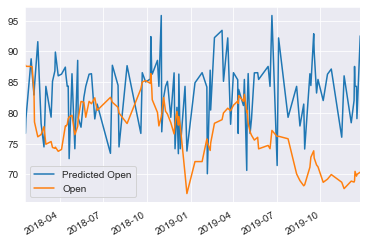

In [24]:
open_predictions_plot = open_predictions_df.plot()

fig = open_y_test.plot(ax = open_predictions_plot).get_figure()

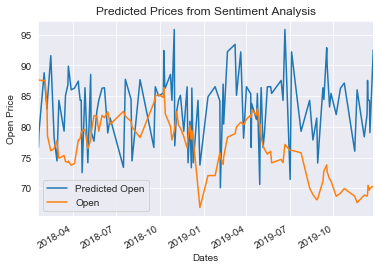

In [27]:
ax = open_predictions_df.rename(columns={"prices": "predicted_price"}).plot(title='Predicted Prices from Sentiment Analysis')
ax.set_xlabel("Dates")
ax.set_ylabel("Open Price")
fig = open_y_test.rename(columns={"prices": "actual_price"}).plot(ax = ax).get_figure()
# fig.savefig("predicted_prices.png")

In [28]:
high_y_train = pd.DataFrame(train['High'])
high_y_test = pd.DataFrame(test['High'])

In [29]:
high_rf = RandomForestRegressor()
high_rf.fit(numpy_df_train, high_y_train)

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [30]:
prediction, bias, contributions = ti.predict(high_rf, numpy_df_test)

In [31]:
# Predict the "High" stock prices
high_predictions_df = pd.DataFrame(data=prediction[0:], index = test_date_index.index, columns=['Predicted High'])

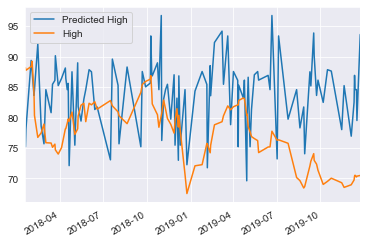

In [32]:
high_predictions_plot = high_predictions_df.plot()

fig = high_y_test.plot(ax = high_predictions_plot).get_figure()

In [33]:
low_y_train = pd.DataFrame(train['Low'])
low_y_test = pd.DataFrame(test['Low'])

In [34]:
low_rf = RandomForestRegressor()
low_rf.fit(numpy_df_train, low_y_train)

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [35]:
prediction, bias, contributions = ti.predict(low_rf, numpy_df_test)

In [36]:
# Predict the "Low" stock prices
low_predictions_df = pd.DataFrame(data=prediction[0:], index = test_date_index.index, columns=['Predicted Low'])

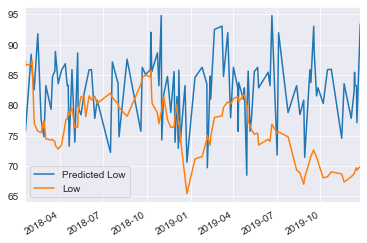

In [37]:
low_predictions_plot = low_predictions_df.plot()

fig = low_y_test.plot(ax = low_predictions_plot).get_figure()

In [38]:
# Create dataframe with "Close" prices
close_y_train = pd.DataFrame(train['Close'])
close_y_test = pd.DataFrame(test['Close'])

In [39]:
# Prepare Random Forest Regression for "Close" prices
close_rf = RandomForestRegressor()
close_rf.fit(numpy_df_train, close_y_train)

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [40]:
prediction, bias, contributions = ti.predict(close_rf, numpy_df_test)

In [41]:
# Predict the "Close" stock prices
close_predictions_df = pd.DataFrame(data=prediction[0:], index = test_date_index.index, columns=['Predicted Close'])

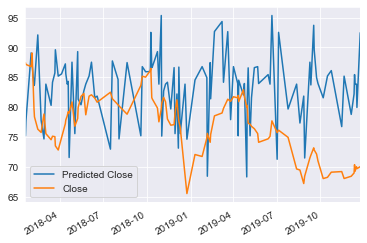

In [42]:
close_predictions_plot = close_predictions_df.plot()

fig = close_y_test.plot(ax = close_predictions_plot).get_figure()

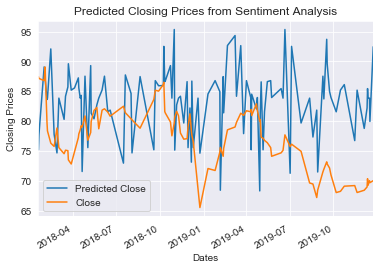

In [45]:
ax = close_predictions_df.rename(columns={"prices": "predicted_price"}).plot(title='Predicted Closing Prices from Sentiment Analysis')
ax.set_xlabel("Dates")
ax.set_ylabel("Closing Prices")
fig = close_y_test.rename(columns={"prices": "actual_price"}).plot(ax = ax).get_figure()
fig.savefig("predicted__exxon_prices.png")

In [46]:
# Create dataframe with "Volume" values
volume_y_train = pd.DataFrame(train['Volume'])
volume_y_test = pd.DataFrame(test['Volume'])

In [47]:
# Prepare Random Forest Regression for "Volume" values
volume_rf = RandomForestRegressor()
volume_rf.fit(numpy_df_train, volume_y_train)

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [48]:
prediction, bias, contributions = ti.predict(volume_rf, numpy_df_test)

In [49]:
# Predict the "Volume" values
volume_predictions_df = pd.DataFrame(data=prediction[0:], index = test_date_index.index, columns=['Volume'])

In [50]:
# Combine all predicted prices to prepare data for backtesting
predicted_historical = pd.concat(
    [open_predictions_df, high_predictions_df, low_predictions_df, close_predictions_df, volume_predictions_df],
    axis=1,
    join="inner"
)
predicted_historical

,Predicted Open,Predicted High,Predicted Low,Predicted Close,Volume
2018-01-18,76.654182,75.210132,75.709066,75.191331,2.042248e+07
2018-01-19,79.052674,78.096014,76.722441,77.672655,2.144327e+07
2018-01-30,88.786768,89.380081,88.412976,89.079498,1.564138e+07
2018-02-01,86.516811,87.593441,85.931878,87.106406,1.785185e+07
2018-02-05,82.887684,83.639739,82.543200,83.623912,1.344376e+07
...,...,...,...,...,...
2019-12-12,87.546772,86.928832,85.438169,85.444735,1.748396e+07
2019-12-13,84.305888,84.584950,83.240951,83.847071,1.649325e+07
2019-12-16,84.305888,84.584950,83.240951,83.847071,1.649325e+07
2019-12-17,79.056360,79.517711,77.142118,79.939712,1.743036e+07


In [51]:
# Rename column names to satisfy backtesting requirements
predicted_historical = predicted_historical.rename(columns={
    "Predicted Open":"Open",
    "Predicted High":"High",
    "Predicted Low":"Low",
    "Predicted Close":"Close",
    "Predicted Volume":"Volume",
})
predicted_historical

,Open,High,Low,Close,Volume
2018-01-18,76.654182,75.210132,75.709066,75.191331,2.042248e+07
2018-01-19,79.052674,78.096014,76.722441,77.672655,2.144327e+07
2018-01-30,88.786768,89.380081,88.412976,89.079498,1.564138e+07
2018-02-01,86.516811,87.593441,85.931878,87.106406,1.785185e+07
2018-02-05,82.887684,83.639739,82.543200,83.623912,1.344376e+07
...,...,...,...,...,...
2019-12-12,87.546772,86.928832,85.438169,85.444735,1.748396e+07
2019-12-13,84.305888,84.584950,83.240951,83.847071,1.649325e+07
2019-12-16,84.305888,84.584950,83.240951,83.847071,1.649325e+07
2019-12-17,79.056360,79.517711,77.142118,79.939712,1.743036e+07


In [52]:
from backtesting import Backtest, Strategy
from backtesting.lib import crossover

from backtesting.test import SMA

//anaconda3/lib/python3.7/site-packages/backtesting/_plotting.py:37: UserWarning: Jupyter Notebook detected. Setting Bokeh output to notebook. This may not work in Jupyter clients without JavaScript support (e.g. PyCharm, Spyder IDE). Reset with `bokeh.io.reset_output()`.
  warnings.warn('Jupyter Notebook detected. '


Loading BokehJS ...

In [53]:
class SmaCross(Strategy):
    def init(self):
        Close = self.data.Close
        self.ma1 = self.I(SMA, Close, 10)
        self.ma2 = self.I(SMA, Close, 20)
        
    def next(self):
        if crossover(self.ma1, self.ma2):
            self.buy()
        elif crossover(self.ma2, self.ma1):
            self.sell()
            
        
bt = Backtest(predicted_historical, SmaCross,
             cash=10000, commission=.002)
bt.run()
bt.plot()

In [59]:
class SmaCross(Strategy):
    def init(self):
        Close = self.data.Close
        self.ma1 = self.I(SMA, Close, 10)
        self.ma2 = self.I(SMA, Close, 20)
        
    def next(self):
        if crossover(self.ma1, self.ma2):
            self.buy()
        elif crossover(self.ma2, self.ma1):
            self.sell()
            
        
bt = Backtest(exxon_two_year_data, SmaCross,
             cash=10000, commission=.002)
bt.run()
bt.plot()

In [56]:
exxon_historical

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,68.720001,69.260002,68.190002,69.150002,49.342556,27809100
2010-01-05,69.190002,69.449997,68.800003,69.419998,49.535217,30174700
2010-01-06,69.449997,70.599998,69.339996,70.019997,49.963345,35044700
2010-01-07,69.900002,70.059998,69.419998,69.800003,49.806370,27192100
2010-01-08,69.690002,69.750000,69.220001,69.519997,49.606567,24891800
...,...,...,...,...,...,...
2020-02-03,61.380001,61.419998,60.369999,60.730000,59.870472,27397300
2020-02-04,61.450001,61.910000,59.889999,59.970001,59.121231,31922100
2020-02-05,60.750000,62.930000,60.599998,62.730000,61.842167,32099200


In [58]:
exxon_two_year_data = exxon_historical.loc[test_start_date:test_end_date]